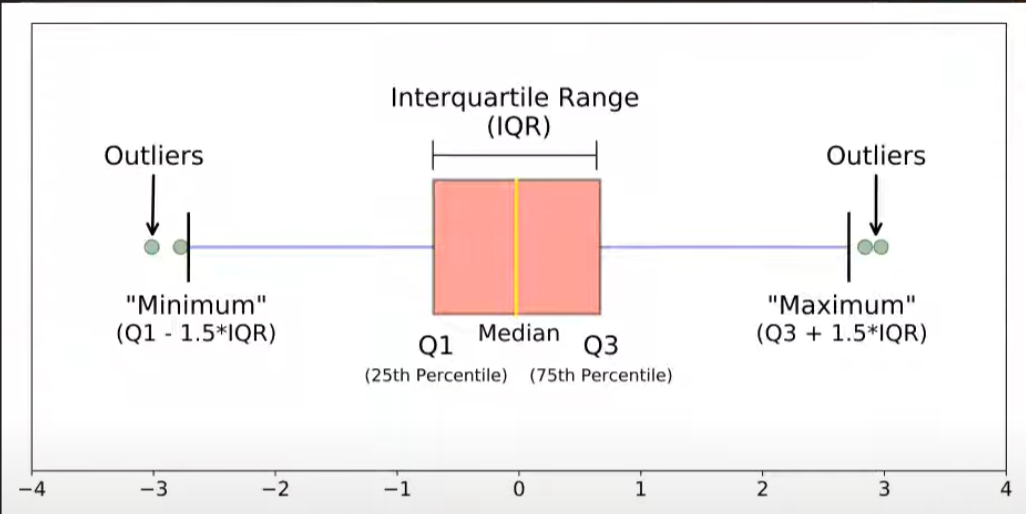

# Outlier Removal Using the IQR Method

## What is the IQR Method?

The Interquartile Range (IQR) method is a popular technique for detecting and removing outliers from a dataset. It is based on the range between the first quartile (Q1) and the third quartile (Q3) of the data. This method is particularly useful for data that is not normally distributed.

## Steps for Outlier Detection and Removal Using the IQR Method

1. **Calculate the First Quartile (Q1):**  
   The first quartile is the median of the lower half of the dataset. It represents the 25th percentile.

2. **Calculate the Third Quartile (Q3):**  
   The third quartile is the median of the upper half of the dataset. It represents the 75th percentile.

3. **Calculate the Interquartile Range (IQR):**  
   \[
   IQR = Q3 - Q1
   \]  
   The IQR measures the spread of the middle 50% of the data.

4. **Determine the Outlier Boundaries:**
   - **Lower Bound:**  
     Lower Bound = Q1 - 1.5 x IQR

   - **Upper Bound:**  
     Upper Bound = Q3 + 1.5 x IQR
     
   These boundaries define the range of acceptable data points. Any data point below the lower bound or above the upper bound is considered an outlier.

5. **Identify Outliers:**  
   Any data point outside the range defined by the lower and upper bounds is considered an outlier.

6. **Remove or Treat Outliers:**  
   Depending on the analysis, you can either remove the outliers or treat them by capping or transformation.

## Example

Suppose you have a dataset: `[10, 12, 14, 15, 18, 22, 26, 29, 30, 100]`

- **Step 1:** Calculate Q1 (25th percentile): `14`  // formula = df['columnName'].quantile(0.25)
- **Step 2:** Calculate Q3 (75th percentile): `29`  // formula = df['columnName'].quantile(0.25)
- **Step 3:** Calculate IQR:  
  IQR = 29 - 14 = 15
  
- **Step 4:** Determine the outlier boundaries:
  - **Lower Bound:**  
    14 - 1.5 X 15 = -8.5

  - **Upper Bound:**  
    29 + 1.5 X 15 = 51.5

- **Step 5:** Identify Outliers: The value `100` is above the upper bound of `51.5`, so it is an outlier.
- **Step 6:** Remove or treat the outlier as needed.

This method is robust and easy to apply, making it a preferred choice for detecting outliers in various types of datasets.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


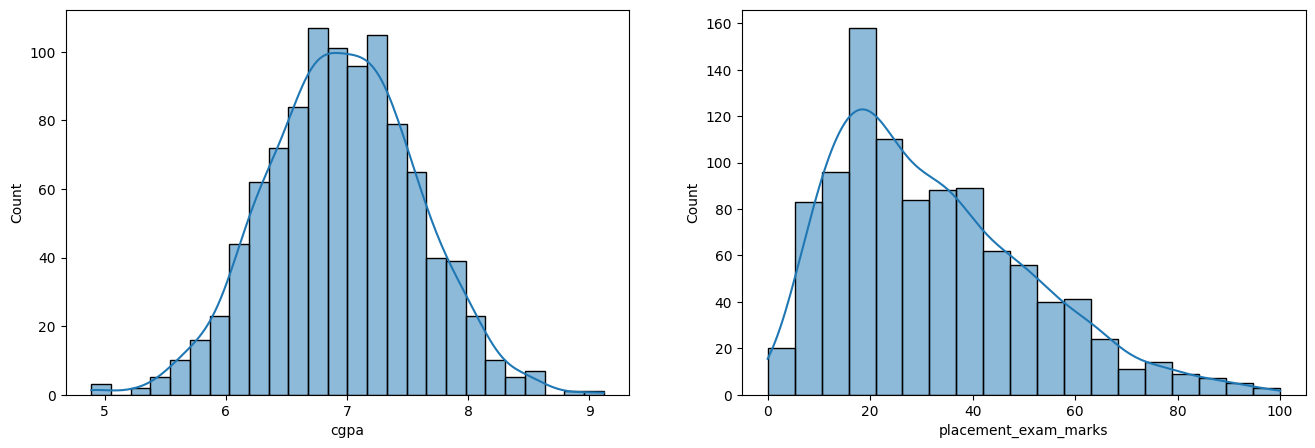

In [9]:
plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

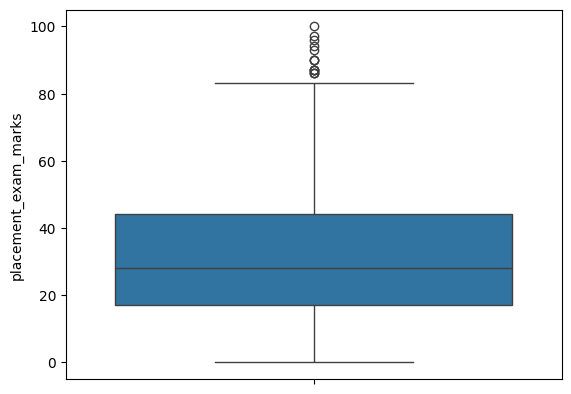

In [15]:
sns.boxplot(df['placement_exam_marks'])

In [18]:
# Finding The IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [19]:
percentile75

44.0

In [20]:
percentile25

17.0

In [21]:
iqr = percentile75 - percentile25
iqr

27.0

In [22]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [24]:
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding Outliers

In [25]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [26]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [35]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

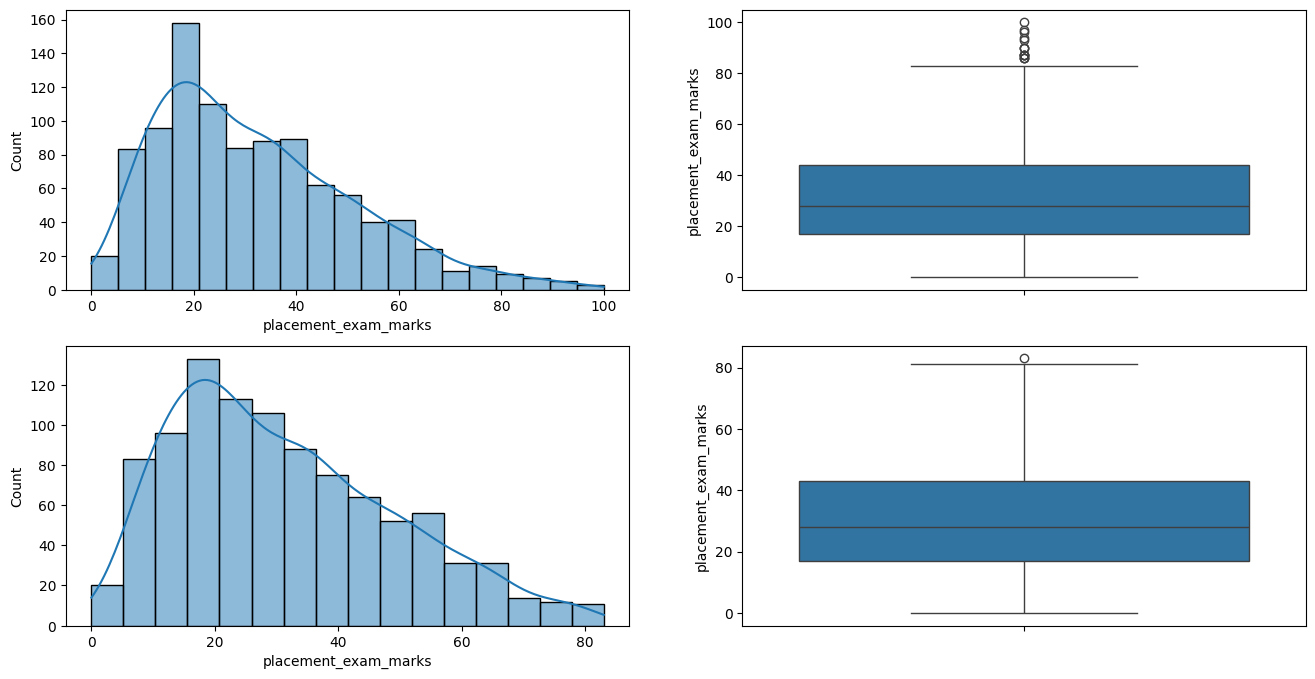

In [33]:
# comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## Capping

In [36]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [37]:
new_df_cap.shape

(1000, 3)

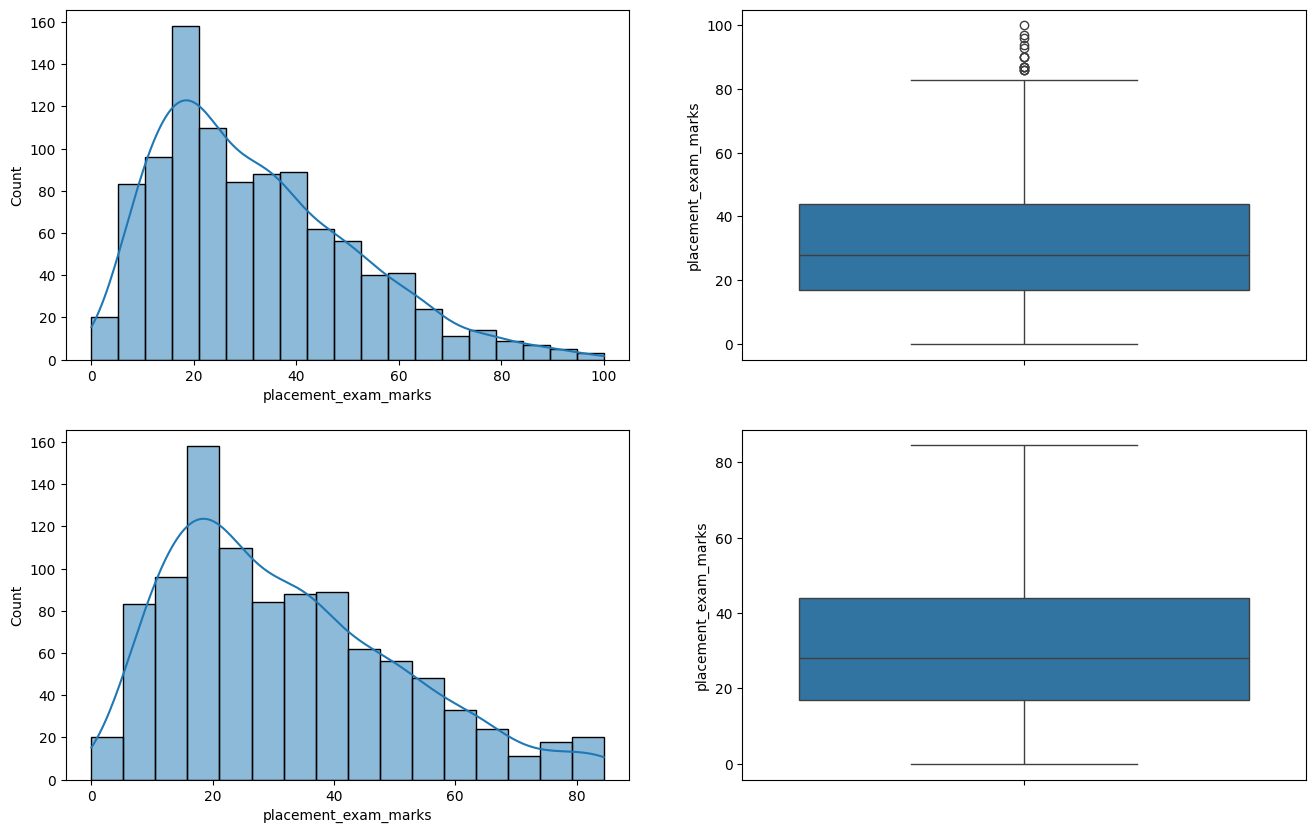

In [43]:
# comparing

plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()